In [18]:
from penne1 import *
from dataset import *
from torch.utils.data import DataLoader
from tqdm import tqdm, tqdm_notebook
device = "cuda" if torch.cuda.is_available() else "cpu"

In [10]:
model = PenneModel()
model.load_state_dict(torch.load('models/penne1.pth'))
model.eval()

dataset = SensorDataset()
train_size = round(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [19]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

for epoch in tqdm_notebook(range(150)):

    for sample, label in train_loader:
        sample = sample.to(device=device, dtype=torch.float)
        label = label.to(device=device, dtype=torch.float)

        optimizer.zero_grad()   # zero the gradient buffers
        output = model(sample)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()    # Does the update
        # print(loss.item())


/var/folders/61/nqhrkf5d041524kydx9x72dc0000gn/T/ipykernel_15687/685865852.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(150)):


  0%|          | 0/150 [00:00<?, ?it/s]

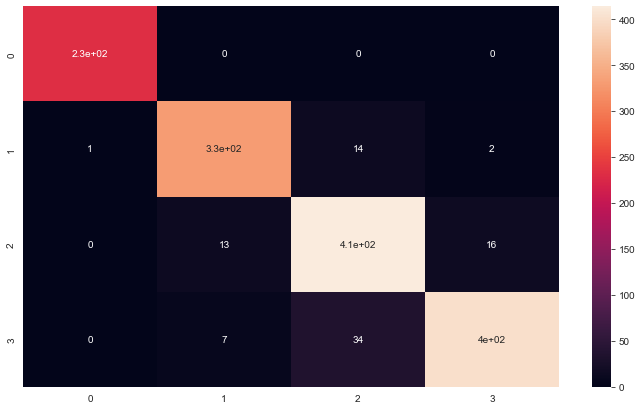

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plot

y_pred = []
y_true = []

for sample, labels in test_loader:
    sample = sample.to(device=device, dtype=torch.float)
    labels = labels.to(device=device, dtype=torch.float)

    output = model(sample)

    output = (torch.max(output, 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
    labels = (torch.max(labels,1)[1]).data.cpu().numpy()
    y_true.extend(labels) # Save Truth

classes = (0,1,2,3)

cf_matrix = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plot.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plot.show()


In [21]:
torch.save(model.state_dict(), "models/penne2AlPesto1.pth")